In [25]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split

# Датасет о болезни сердца

In [2]:
hs = pd.read_csv('.//datasets//datasets_33180_43520_heart.csv')
hs.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
x_train = hs.drop(['target'], axis=1)
y_train = hs.target
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

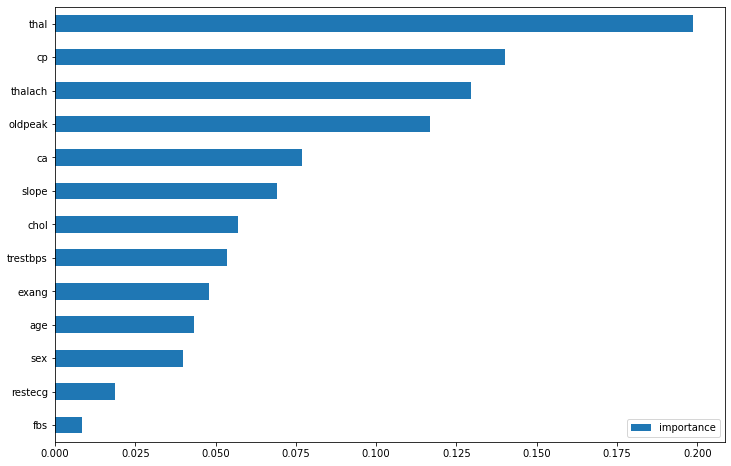

In [4]:
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

# Датасет с грибами

In [8]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [9]:
x_train = df.drop(['class'], axis=1)
y_train = df['class']

In [10]:
rfc = RandomForestClassifier(random_state=0)
param = {'n_estimators': [i for i in range(10, 51, 10)], 
         'max_depth': [i for i in range(1, 13, 2)], 
         'min_samples_leaf': [i for i in range(1, 8)],
         'min_samples_split': [i for i in range(2, 10, 2)]}
gscv =  GridSearchCV(rfc, param, cv=3, n_jobs=-1, verbose=1)
gscv.fit(x_train, y_train)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

Пришлось обучать модель через Colab. Обучение прошло за 2 минуты 6 секунд. Компьютер не потянул.

In [ ]:
gscv.best_params_

In [ ]:
best_c = gscv.best_estimator_
imp = pd.DataFrame(best_c.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
test_set = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
test_set.head()

In [ ]:
list(best_c.predict(test_set)).count(1)

# Классификация космолётов

In [41]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
data.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [42]:
X = data.drop(['class'], axis=1)
y = pd.get_dummies(data['class'])
list_col = list(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
rand_forest.score(X_test, y_test)

1.0

In [43]:
validation = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')
validation.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [45]:
res = pd.DataFrame(rand_forest.predict(validation), columns=list_col)
res.sum()

cruiser      230
fighter      675
transport    595
dtype: int64

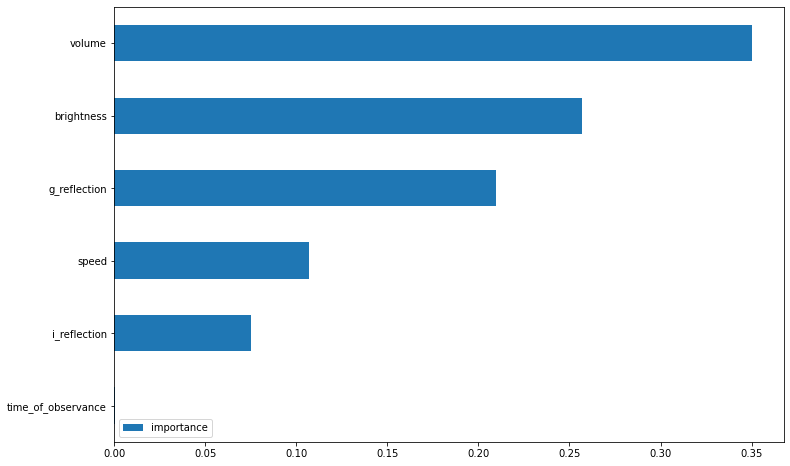

In [46]:
imp = pd.DataFrame(rand_forest.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [52]:
import matplotlib

In [55]:
ndf = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')
ndf.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


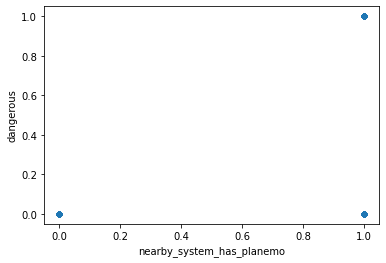

In [56]:
ndf.plot.scatter(x = 'nearby_system_has_planemo', y ='dangerous')

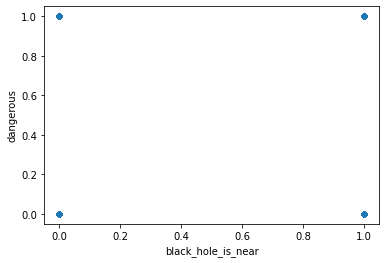

In [57]:
ndf.plot.scatter(x = 'black_hole_is_near', y ='dangerous')

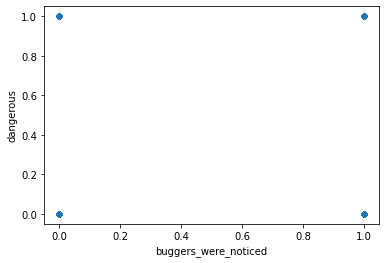

In [58]:
ndf.plot.scatter(x = 'buggers_were_noticed', y ='dangerous')

# Подсчёт скорости выполнения операции

In [60]:
from time import time

In [67]:
%%timeit
df.describe().loc['mean']

111 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
%%timeit
df.apply('mean')

1.11 ms ± 135 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [69]:
%%timeit
df.mean(axis=0)

1.05 ms ± 138 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [70]:
%%timeit
df.apply(np.mean)

6.76 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [93]:
sdf = pd.read_csv('.\\datasets\\submissions_data_train.csv')
sdf.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [95]:
sdf = sdf.query('submission_status == "wrong"')
n = list(pd.unique(sdf.step_id))

In [99]:
steps = list(sdf.step_id)

In [102]:
m=[steps.count(i) for i in n]
m

[8960,
 5937,
 13373,
 4546,
 4219,
 5855,
 5476,
 4946,
 10300,
 6824,
 1239,
 16084,
 725,
 10003,
 7778,
 13002,
 7172,
 6457,
 3410,
 1860,
 9388,
 7748,
 4935,
 2495,
 4231,
 1273,
 2635,
 1881,
 5500,
 3296,
 1873,
 3857,
 1392,
 762,
 1243,
 6893,
 5851,
 7258,
 4573,
 1905,
 1889,
 932,
 1172,
 2662,
 2124,
 2517,
 4602,
 1443,
 879,
 703,
 2286,
 2220,
 859,
 6818,
 7530,
 3879,
 723,
 2131,
 1044,
 1865,
 1072,
 969,
 1238,
 2139,
 707,
 713,
 5456,
 1058,
 811,
 1998,
 673,
 860,
 2037,
 808,
 342,
 85]

In [103]:
m.index(16084)

11

In [104]:
n[11]

31978